In [1]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
with open('results/results/results_with_hmi.json') as f:
    results_with_hmi = json.load(f)
with open('results/results/results_without_hmi.json') as f:
    results_without_hmi = json.load(f)

In [26]:
def plot_roc(results):
    plt.gcf().set_size_inches((8,8))
    roc = np.array([zip(result['fpr'], result['tpr']) for result in results['roc']['SVM']])
    plt.plot(np.mean(roc[...,0], axis=0), np.mean(roc[...,1], axis=0))

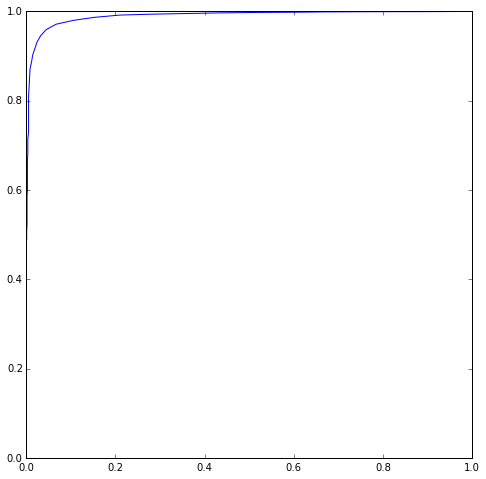

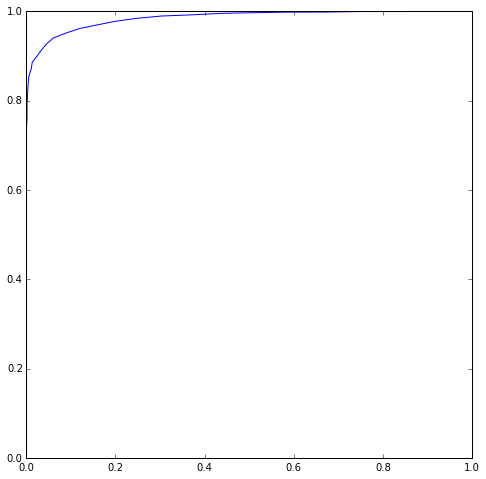

In [27]:
plot_roc(results_with_hmi)
plot_roc(results_without_hmi)